## Purpose: Nonlinear fit

Demonstration: 
    1. Gauss Model
    2. LevenbergMarquardtFitter
    3. Compound Model (Gaussian + polynomial)
    4. Compound Model (Gaussian + polynomial + sine)
    5. Evidence calculation (Laplace method)

Author: Do Kester


import stuff

In [1]:
import numpy as numpy
import math

from BayesicFitting import GaussModel
from BayesicFitting import PolynomialModel
from BayesicFitting import SineModel
from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
# define some constants
N = 201
x0 = 0.7                        # x position of gaussian
a0 = 10.0                       # amplitude of gaussian
s0 = 0.4                        # width
b0 = 1.0                        # offset of background
b1 = 0.2                        # slope of background
c0 = 1.4
c1 = 8.0
c2 = 0.0
sig = 0.2

make a Gauss plus background plus sinusoid

In [3]:
x = numpy.linspace( -2.0, 2.0, N, dtype=float )
x2 = ( x - x0 ) / s0
x2 *= x2
ym = a0 * numpy.exp( -0.5 * x2 )             # gauss
ym += b0 + b1 * x                            # linear part
ym += c0 * numpy.sin( c1 * x + c2 )          # sinus

numpy.random.seed( 1357 )
y = ym + sig * numpy.random.randn( N )


Define the model

In [4]:
mdl = GaussModel( )
print( mdl )


Gauss: f( x:p ) = p_0 * exp( -0.5 * ( ( x - p_1 ) / p_2 )^2 )


define the fitter: Fitter

In [5]:
fitter = LevenbergMarquardtFitter( x, mdl )
 
# find the parameters
param = fitter.fit( y )

  

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [   10.733    0.709    0.477]
StDevs     : [    0.218    0.011    0.011]
Chisq      :   263.555
Scale      :     1.154
Evidence   :  -147.994
Covar matrix :
[[    0.047   -0.000   -0.001]
 [   -0.000    0.000    0.000]
 [   -0.001    0.000    0.000]]


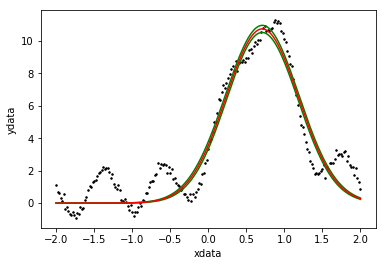

In [7]:
plotFit( x, y, model=mdl, fitter=fitter )

Adding a linear background yields a better fit.

In [8]:
mdl = GaussModel()
mdl += PolynomialModel( 1 )
fitter = LevenbergMarquardtFitter( x, mdl )
param = fitter.fit( y )


Parameters : [    9.792    0.693    0.395    1.100    0.365]
StDevs     : [    0.230    0.010    0.013    0.116    0.080]
Chisq      :   186.652
Scale      :     0.976
Evidence   :  -137.138


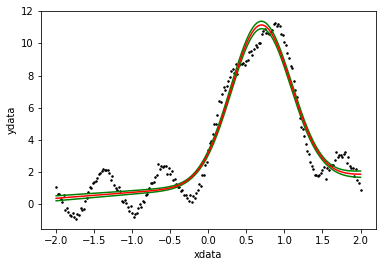

In [9]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
plotFit( x, y, model=mdl, fitter=fitter )

Adding a sine to the model yields a still better fit. The evidence increases further.

In [10]:
mdl = GaussModel()
mdl += PolynomialModel( 1 )
mdl += SineModel()
fitter = LevenbergMarquardtFitter( x, mdl )
param = fitter.fit( y )

Parameters : [   10.048    0.698    0.398    1.017    0.197    1.273   -0.013    1.371]
StDevs     : [    0.044    0.002    0.002    0.022    0.016    0.002    0.018    0.019]
Chisq      :     6.578
Scale      :     0.185
Evidence   :  -107.761


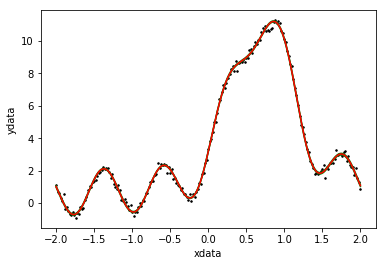

In [11]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
plotFit( x, y, model=mdl, fitter=fitter )

Upto now we assumed in the evidence calculation that the (noise)scale is 1.0. We calculate that the scale = 0.20. When we take that along in the evidence calculation by adding noiseLimits we get again a higher evidence. It shows the importance of having (or fitting) the noise scale. 

See also the noise2 example.

In [12]:
logE = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
print( "Evidence   :", fmt( logE ) )

Evidence   :    -9.081
